### Explore Calendar.csv

In [1]:
# exploration of calendar.csv
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
#pd.set_option('display.max_rows', 5000000)
#pd.set_option('display.max_columns', 5000000)

In [2]:
calendar = pd.read_csv("Data\\raw\\calendar.csv")

In [23]:
print(calendar["listing_id"].value_counts().max())
print(calendar["listing_id"].value_counts().min())

365
350


In [10]:
listings = len(calendar.listing_id.unique())
days = len(calendar.date.unique())

print(f'The are {listings} unique listings over {days} days.')

print(f'The listings start on {calendar.date.min()} and end {calendar.date.max()}')

The are 8949 unique listings over 365 days.
The listings start on 2023-09-17 and end 2024-09-15


In [4]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3884,2023-09-17,f,"$1,449.00","$1,449.00",5,365
1,3884,2023-09-18,f,"$1,449.00","$1,449.00",5,365
2,3884,2023-09-19,f,"$1,449.00","$1,449.00",5,365
3,3884,2023-09-20,f,"$1,449.00","$1,449.00",5,365
4,3884,2023-09-21,f,"$1,449.00","$1,449.00",5,365


In [5]:
calendar.info(verbose=True, show_counts=True) #all non null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3266250 entries, 0 to 3266249
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   listing_id      3266250 non-null  int64 
 1   date            3266250 non-null  object
 2   available       3266250 non-null  object
 3   price           3266250 non-null  object
 4   adjusted_price  3266250 non-null  object
 5   minimum_nights  3266250 non-null  int64 
 6   maximum_nights  3266250 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 174.4+ MB


In [6]:
# availability throughout the year
calendar.available.value_counts()

available
f    1830545
t    1435705
Name: count, dtype: int64

In [11]:
calendar_new = calendar[['date', 'available']]
calendar_new['busy'] = calendar_new.available.map( lambda x: 0 if x == 't' else 1)

calendar_new.head()

C:\Users\scott\AppData\Local\Temp\ipykernel_12176\3159035503.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar_new['busy'] = calendar_new.available.map( lambda x: 0 if x == 't' else 1)


,date,available,busy
0,2023-09-17,f,1
1,2023-09-18,f,1
2,2023-09-19,f,1
3,2023-09-20,f,1
4,2023-09-21,f,1


In [12]:
# mean occupancy for each day
calendar_new = calendar_new.groupby('date')['busy'].mean().reset_index()
calendar_new['date'] = pd.to_datetime(calendar_new['date'])

calendar_new.head()

,date,busy
0,2023-09-17,0.815175
1,2023-09-18,0.774723
2,2023-09-19,0.783439
3,2023-09-20,0.762320
4,2023-09-21,0.772265


In [9]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

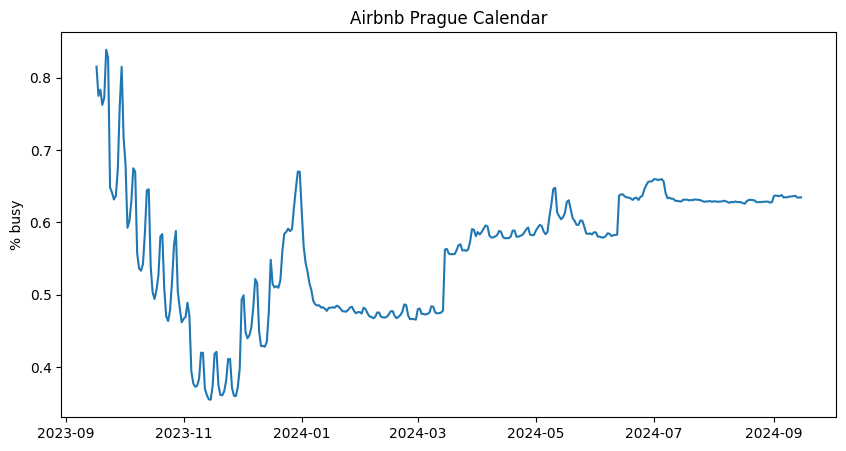

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(calendar_new['date'], calendar_new['busy'])
plt.title('Airbnb Prague Calendar')
plt.ylabel('% busy')
plt.show()

In [13]:
calendar['date'] = pd.to_datetime(calendar['date'])

def get_cleaned_price(price: pd.core.series.Series) -> float:
    """ Returns a float price from a pandas Series including the currency """
    return price.str.replace('$', '').str.replace(',', '').astype(float)

calendar['price'] = get_cleaned_price(calendar['price'])

calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,3884,2023-09-17,f,1449.0,"$1,449.00",5,365
1,3884,2023-09-18,f,1449.0,"$1,449.00",5,365
2,3884,2023-09-19,f,1449.0,"$1,449.00",5,365
3,3884,2023-09-20,f,1449.0,"$1,449.00",5,365
4,3884,2023-09-21,f,1449.0,"$1,449.00",5,365


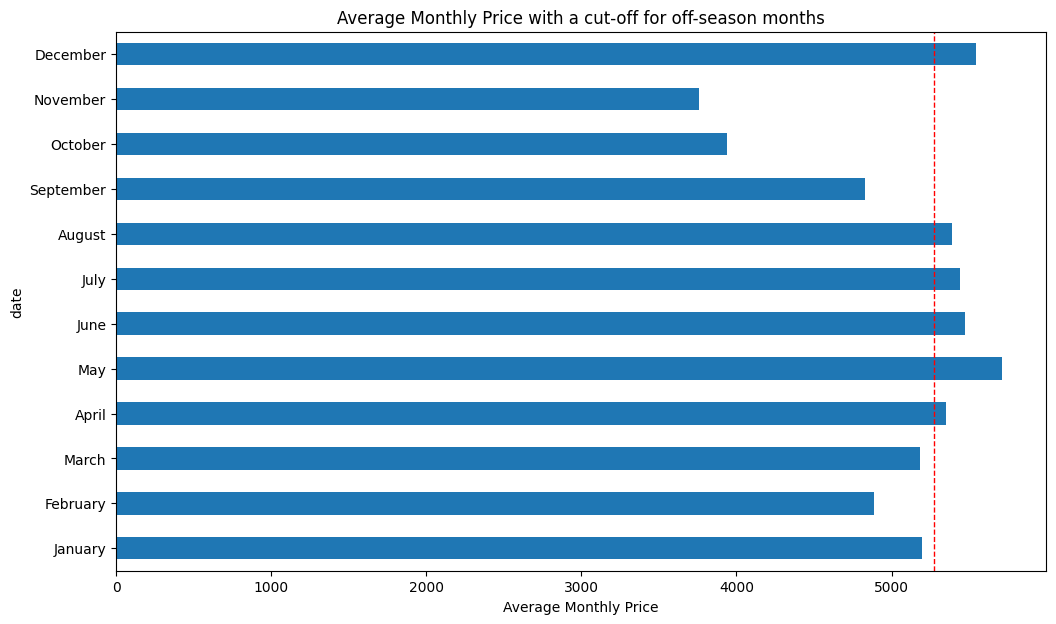

In [28]:
# Group by month number and calculate mean price
mean_per_month = calendar.groupby(calendar['date'].dt.month)['price'].mean()

# Create a list of month names in correct order for later mapping
months = [pd.to_datetime(f'{i}', format='%m').strftime('%B') for i in range(1, 13)]

# Map the index (which is currently month numbers) to month names
mean_per_month.index = mean_per_month.index.map(lambda x: months[x-1])

# Sort the mean prices to find the cut-off point between the top 6 and bottom 6 months
sorted_means = mean_per_month.sort_values()

# Calculate the average price at the 6th and 7th month boundary
cut_off_price = sorted_means.iloc[5:7].mean()

# Plotting
mean_per_month.plot(kind='barh', figsize=(12,7))

# Add a vertical line to cut off the top 6 from the bottom 6 months
plt.axvline(x=cut_off_price, color='red', linestyle='--', linewidth=1)

plt.xlabel('Average Monthly Price')
plt.title('Average Monthly Price with a cut-off for off-season months')
plt.show()

In [13]:
calendar['day_of_the_week'] = calendar.date.dt.day_name()
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,day_of_the_week
0,3884,2023-09-17,f,1449.0,"$1,449.00",5,365,Sunday
1,3884,2023-09-18,f,1449.0,"$1,449.00",5,365,Monday
2,3884,2023-09-19,f,1449.0,"$1,449.00",5,365,Tuesday
3,3884,2023-09-20,f,1449.0,"$1,449.00",5,365,Wednesday
4,3884,2023-09-21,f,1449.0,"$1,449.00",5,365,Thursday


In [14]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
price_week = calendar[['day_of_the_week', 'price']]
price_week.head()

,day_of_the_week,price
0,Sunday,1449.0
1,Monday,1449.0
2,Tuesday,1449.0
3,Wednesday,1449.0
4,Thursday,1449.0


In [15]:
price_week = price_week.groupby(['day_of_the_week']).mean().reindex(days)
price_week

,price
day_of_the_week,
Monday,4848.017753
Tuesday,4815.305751
Wednesday,4837.947972
Thursday,4947.913225
Friday,5481.866514
Saturday,5507.479449
Sunday,4997.469142


([<matplotlib.axis.XTick at 0x1cb9fae48c0>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

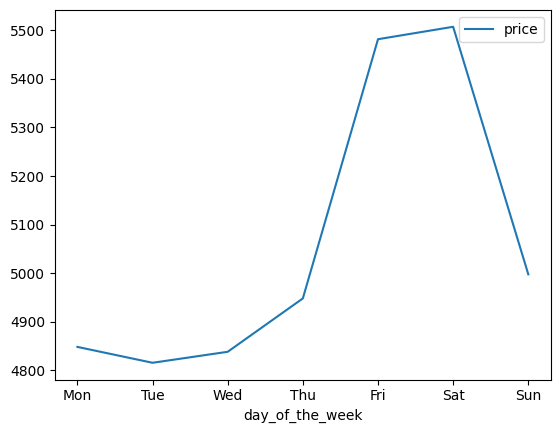

In [16]:
price_week.plot()
ticks = list(range(0, 7, 1))
labels = "Mon Tue Wed Thu Fri Sat Sun".split()
plt.xticks(ticks, labels)

In [17]:
calendar['price'].value_counts()

price
2000.0     94772
1500.0     55739
1200.0     54222
2456.0     41922
2500.0     39970
           ...  
22072.0        1
23074.0        1
9777.0         1
15277.0        1
13673.0        1
Name: count, Length: 14908, dtype: int64

In [18]:
calendar['price'].mean()

5062.108278300803

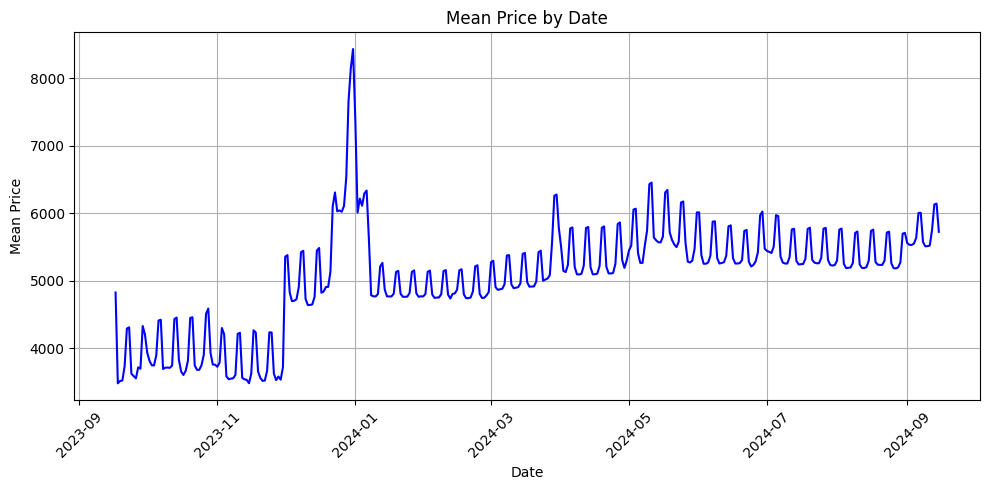

In [19]:
mean_prices = calendar.groupby('date')['price'].mean()

# Plotting the mean prices over time
plt.figure(figsize=(10, 5))
plt.plot(mean_prices.index, mean_prices.values, color='b')
plt.title('Mean Price by Date')
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()